In [85]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# from mpl_toolkits.mplot3d import Axes3D
import mpl_toolkits.mplot3d.axes3d as PieChart

# File to Load (Remember to change these)
city_data_to_load = "../Matplotlib/city_data.csv"
ride_data_to_load = "../Matplotlib/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
# combine_city_ride_data_df = pd.merge(city_data_to_load, ride_data_to_load, on = "City")
# city_df = city_df.drop_duplicates('city', keep = 'first')
# Display the data table for preview
# combine_city_ride_data_df.head()
merged_df = pd.merge(ride_df, city_df, on = 'city', how='left')
merged_df.head(5)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

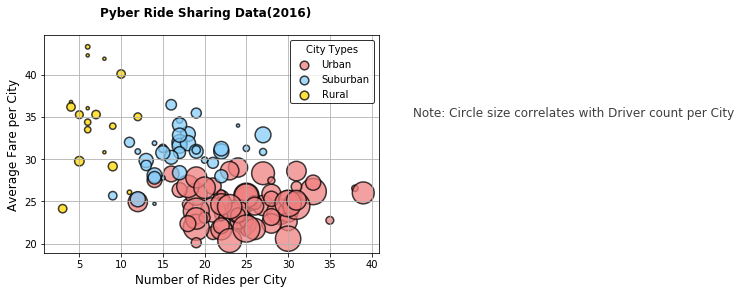

In [86]:
#group be city name
by_city = merged_df.groupby('city')

# var holding avg fare by city
avg_fare = by_city.mean()['fare']

#var holding rides by city
ride_count = by_city['ride_id'].count()

# num of drivers
driver_count = by_city.mean()['driver_count']

# city type data
city_type = city_df.set_index('city')['type']

# dataframe from above series
city_info = pd.DataFrame({
    "Number of Rides": ride_count,
    "Average Fare": avg_fare,
    "Number of Drivers": driver_count,
    "Type of City": city_type
})

# city_info.sort_values('Number of Drivers', ascending = False)

#separated dfs for city categories
rural = city_info[city_info['Type of City'] == 'Rural']
suburban = city_info[city_info['Type of City'] == 'Suburban']
urban = city_info[city_info['Type of City'] == 'Urban']

#Color Dictionary 
color_scheme = {'Gold':'#FFD700', 'Sky Blue':'#87CEFA', 'Coral':'#F08080'}
city_color = {'Urban': color_scheme['Coral'], 'Suburban': color_scheme['Sky Blue'], 'Rural': color_scheme['Gold']}

plt.suptitle('Pyber Ride Sharing Data(2016)', fontweight="bold")

# three scatter plots for each city type
plt.scatter(urban['Number of Rides'], urban['Average Fare'], s = urban['Number of Drivers']*10, color = city_color['Urban'], edgecolor = 'black', label = 'Urban', alpha = .75, linewidth = 1.5)
plt.scatter(suburban['Number of Rides'], suburban['Average Fare'], s = suburban['Number of Drivers']*10, color = city_color['Suburban'], edgecolor = 'black', label = 'Suburban', alpha = .75,linewidth = 1.5)
plt.scatter(rural['Number of Rides'], rural['Average Fare'], s = rural['Number of Drivers']*10, color = city_color['Rural'], edgecolor = 'black', label = 'Rural', alpha = .75,linewidth = 1.5)

#print scatter plot
# plt.title('Note : Circle size correlates with Driver count per City')
plt.xlabel('Number of Rides per City',fontsize=12)
plt.ylabel('Average Fare per City',fontsize=12)

plt.text(45, 35, "Note: Circle size correlates with Driver count per City", fontsize=12, alpha=0.75 )

legend = plt.legend(frameon = True, edgecolor = 'black', title="City Types", loc="upper right")

# plt.legend(handles=[urban, suburban, rural], loc="best")
legend.legendHandles[0]._sizes = [75]
legend.legendHandles[1]._sizes = [75]
legend.legendHandles[2]._sizes = [75]
plt.grid()
plt.show()
plt.savefig("../Matplotlib/Bubble Plot of Ride Sharing Data.png")

## Total Fares by City Type

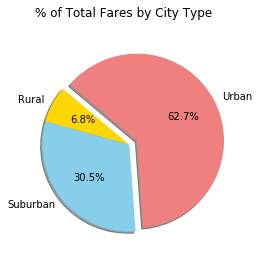

In [87]:
# Calculate Type Percents
by_type = merged_df.groupby('type')['type','fare','ride_id','driver_count']
sum_of_fare = by_type.sum()['fare']

# Build Pie Chart
labels = sum_of_fare.index

# colors = [city_color[n] for n in labels]

colors = ["gold", "skyblue", "lightcoral"]
explode = [0 ,0, .1]
plt.pie(sum_of_fare, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Save Figure
plt.suptitle('% of Total Fares by City Type')

# plt.title('% of Total Fares by City Type')
plt.savefig("../Matplotlib/Total Fares by City Type.png")
plt.show()

## Total Rides by City Type

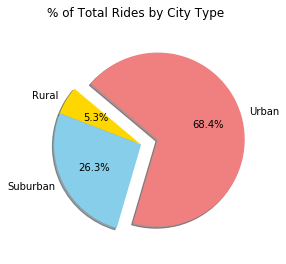

In [88]:
# Calculate Ride Percents
ride_sum = by_type.count()['ride_id']
labels = ride_sum.index
# Build Pie Chart
# colors = [city_color[n] for n in labels]
colors = ["gold", "skyblue", "lightcoral"]
explode = [0 ,0, .2]
plt.pie(ride_sum, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Save Figure
plt.suptitle('% of Total Rides by City Type')
plt.savefig("../Matplotlib/Total Rides by City Type.png")
plt.show()

## Total Drivers by City Type

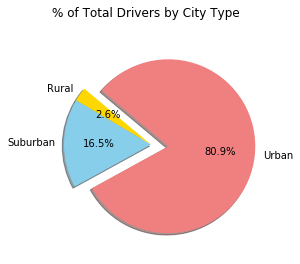

<Figure size 432x288 with 0 Axes>

In [89]:
# Calculate Driver Percents
driver_sum = city_df.groupby('type').sum()['driver_count']
labels = driver_sum.index
# Build Pie Charts
# colors = [city_color[n] for n in labels]
colors = ["gold", "skyblue", "lightcoral"]
explode = [0 ,0, .2]
plt.pie(driver_sum, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Save Figure
plt.suptitle('% of Total Drivers by City Type')

# # Create a PieChart object of size 360 x 300 pixels

# c = PieChart(500, 400)

# # # # Set the center of the pie at (180, 140) and the radius to 100 pixels
# c.setPieSize(180, 140, 100)
# # plt.pie = plt.figure()
# # ax = plt.pie.add_subplot(111, projection='3d')
# # ax.view_init(30, 185)

# # Draw the pie in 3D
# c.set3D()
# PieChart.view_init(200, 100)
# # Attaching 3D axis to the figure

# # plt.pie = plt.figure()
# # ax = p3.Axes3D(plt.pie)
plt.show()
plt.tight_layout()

In [90]:
# Save the plot and display it
plt.savefig("../Matplotlib/PTotal Drivers by City Type.png")
plt.show()

<Figure size 432x288 with 0 Axes>